# Bootstrapped Line Fitting

In this notebook, you will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Generative Model

We start with a generative model:

$$
x \sim U(10,20)
$$

$$
y \sim w x + b + N(0,\sigma^2)
$$

Here are the input parameters we are going to use for this model.

In [2]:
w = 0.75
b = 3.5
sigma = 0.5

Generate two NumPy arrays of 50 points for this model. Store these values in the arrays `x` and `y`:

In [9]:
# YOUR CODE HERE
def model(x, w, b):
    return w*x+b
x = np.random.uniform(10.0, 20.0, 50)
y = model(x, w, b) + np.random.normal(0, sigma, 50)

Make an appropriately labeled scatter plot of the `x` and `y` data. You should see fluctuations around a straight line. If you don't, you forgot to pass the `size` argument to `np.random.normal` when generating your data above.

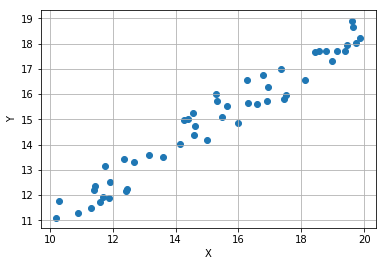

In [10]:
# YOUR CODE HERE
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

## Fitting the model

In [11]:
from scipy.optimize import minimize

Write a function that computes the MSE for the model $y_{model}(x) = w x + b$:

In [13]:
def mse(theta, x, y):
    """Compute the mean squared error (MSE) for our model.
    
    Parameters
    ----------
    theta: array, list, tuple
        The array of model parameters [w, b].
    x: np.array
        The observed x data.
    y: np.array
        The observed y data.

    """
    # YOUR CODE HERE
    w=theta[0]
    b=theta[1]
    return np.sum((y-b-w*x)**2)/(len(y))

Write a function that uses `scipy.optimize.minimize` to minimize the above MSE to find the best value of theta.

In [26]:
def fit(x, y):
    """Fit our model to observed data and return the best values of theta = [w, b]."""
    # YOUR CODE HERE
    return minimize(mse,x0=(1,1), args= (x, y)).x

Here are the estimated model parameters. These should be close to the true values we used to generate the data:

In [27]:
w_hat, b_hat = fit(x,y)
w_hat, b_hat

(0.74486153241292852, 3.6252177530620537)

Compute the residuals and visualize them with an appropriately labeled histogram:

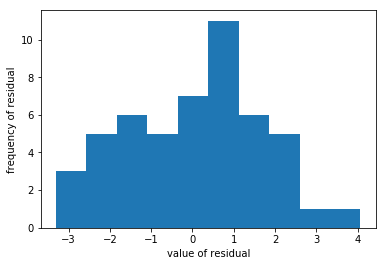

In [58]:
x = np.random.uniform(10.0, 20.0, 50)
y_observed=model(x, 0.75, 3.5) + np.random.normal(0, sigma, 50)
y_predicted=model(x, w_hat, b_hat)
residual=(y_observed)-(y_predicted)
_=plt.hist(residual,bins=10)
_=plt.xlabel("value of residual")
_=plt.ylabel("frequency of residual")
plt.show()

Compute the $R^2$ for the model:

In [59]:
y_bar=(np.sum(y_observed))/len(y_observed)
ssr=np.sum((y_observed-y_bar)**2)
ssto=np.sum((y_predicted-y_bar)**2)
r_squared=ssr/ssto
r_squared

89.32077711845632

Plot the model predictions (line), on the same plot as the original data (points). Label the two series of data using a legend.

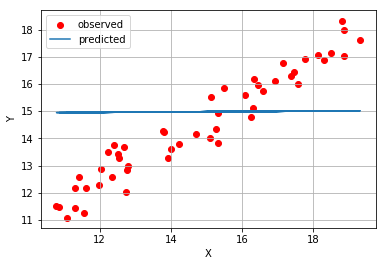

In [66]:
w = 0.75
b = 3.5
sigma = 0.5
w_hat, b_hat = fit(x,y)
w_hat, b_hat
x = np.random.uniform(10.0, 20.0, 50)
y_observed=model(x, 0.75, 3.5) + np.random.normal(0, sigma, 50)
y_predicted=model(x, w_hat, b_hat)
observed=plt.scatter(x, y_observed,color='r')
predicted, =plt.plot(x,y_predicted)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend((observed,predicted),('observed','predicted'))
plt.grid(True)

## Bootstrap

Write a function, `bootstrap`, that can create boostrapped versions of the `x` and `x` arrays above. It is important that you bootstrap pairs of `x[i],y[i]` to preserve correlations in the model. Remember, to bootstrap data you will draw random samples with replacement.

In [69]:
def bootstrap(x, y):
    """Return boostrapped versions of the input X and Y arrays, perserving correlations.
    
    Parameters
    ----------
    x: ndarray
        Input x array.
    y: ndarray
        Input y array.
    
    Returns
    -------
    xx: ndarray
        The boostrapped x array with the same shape as x and correlated random samples
        drawn with replacement.
    yy: ndarray
        The bootstrapped y array with the same shape as y and correlated random samples
        drawn with replacement.
    """
    # YOUR CODE HERE
    ind = np.random.randint(0, len(x), len(y))
    return x[ind], y[ind]

In [70]:
np.random.seed(0)
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
ab, bb = bootstrap(a, b)
for element in ab:
    assert element in a
for element in bb:
    assert element in b
assert len(a)==len(ab)
assert len(ab)==len(bb)

Write a function, `bootstrap_fit`, that takes finds the slope and intercept of the input `X` and `Y` data  using the `fit` function above. Your function should perform this fit `n` times using bootstrapped data.

In [71]:
def bootstrap_fit(x, y, n):
    """Fit a straight line to x and y n times using bootstrapping.
    
    Returns
    -------
    (w, b): tuple of ndarrays
        A tuple of 1d arrays with the bootstrapped values of the weight and intercept.
    """
    # YOUR CODE HERE
    m = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        bootX, bootY = bootstrap(x, y)
        m[i], b[i] = fit(bootX, bootY)
        
    return m, b

Using the original `x` and `y` data above:

* Find the bootstrapped weights/slopes and intercepts (bootstrap 200 times).
* Make an appropriately labeled 2d histogram of the bootstrapped slopes and intercepts.
* Find and print the 95% confidence intervals for the slope and intercept.

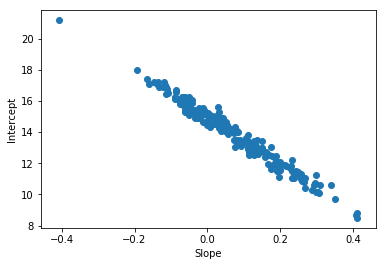

Slope 95% Confidence Interval: [-0.13726323  0.31109439]
Intercetp 95% Confidence Interval: [ 10.13226496  17.18918296]


In [76]:
m,b=bootstrap_fit(x,y,200)
plt.scatter(m,b)
plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.show()
print("Slope 95% Confidence Interval:", np.percentile(m, (2.5, 97.5)))
print("Intercetp 95% Confidence Interval:", np.percentile(b, (2.5, 97.5)))